In [150]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

filepath = "/content/drive/MyDrive/ethics-project-images/results_questionnaire/data_ethics-epistemology-ai_2025-07-03_15-05.xlsx"
df = pd.read_excel(filepath, header=1) # Use the first row as header
df = df.iloc[1:].copy()

# Select column groups
demographic_cols = ['Geschlecht', 'Alter (Kategorien, 5 Jahre)', 'Formale Bildung (einfach)']
cultural_cols = [col for col in df.columns if col.startswith("Cultural Background")]
demographic_cols.extend(cultural_cols)
answer_cols = ["Image Bias", "Image Bias.1", "Image Bias.2", "Image Bias.3", "Image Bias.4", "Prompt Bias", "Prompt Bias.1", "Prompt Bias.2", "Prompt Bias.3", "Prompt Bias.4"]
stereotype_columns = [col for col in df.columns if col.startswith("Stereotypes:")]
image_bias_cols = ["Image Bias", "Image Bias.1", "Image Bias.2", "Image Bias.3", "Image Bias.4"]

df_demo = df[demographic_cols].copy()
df_answers = df[answer_cols].copy()
df_stereotypes = df[stereotype_columns].copy()

# aggregate education levels
higher_education_keywords = ['university', 'Baccalaureate', 'Higher education entrance qualification', "Bachelor's Degree"]
df_demo['Education Level'] = df_demo['Formale Bildung (einfach)'].apply(lambda x: 'Higher Education' if any(keyword in str(x) for keyword in higher_education_keywords) else 'Lower Education')
df_demo.drop(["Formale Bildung (einfach)"], axis=1, inplace=True)

# filtering
df_combined = pd.concat([df_demo, df_answers, df_stereotypes], axis=1)
df_combined.fillna(0, inplace=True)
mask = (df_combined[image_bias_cols] != 0).all(axis=1)
df_combined_filtered = df_combined[mask].copy()
df_combined_filtered.replace("Not checked", 0, inplace=True)
df_combined_filtered.replace("Checked", 1, inplace=True)

stereotype_columns_filtered = [col for col in df_combined_filtered.columns if col.startswith("Stereotypes:")]

# rename columns so they can be easily matched
renaming_dict = {}
for col in stereotype_columns_filtered:
    if col.endswith(".1"):
        new_name = "Image Stereotypes 1: " + col.replace("Stereotypes:", "").replace(".1", "").strip()
    elif col.endswith(".2"):
        new_name = "Image Stereotypes 2: " + col.replace("Stereotypes:", "").replace(".2", "").strip()
    elif col.endswith(".3"):
        new_name = "Image Stereotypes 3: " + col.replace("Stereotypes:", "").replace(".3", "").strip()
    elif col.endswith(".4"):
        new_name = "Image Stereotypes 4: " + col.replace("Stereotypes:", "").replace(".4", "").strip()
    elif col.endswith(".5"):
        new_name = "Prompt Stereotypes 0: " + col.replace("Stereotypes:", "").replace(".5", "").strip()
    elif col.endswith(".6"):
        new_name = "Prompt Stereotypes 1: " + col.replace("Stereotypes:", "").replace(".6", "").strip()
    elif col.endswith(".7"):
        new_name = "Prompt Stereotypes 2: " + col.replace("Stereotypes:", "").replace(".7", "").strip()
    elif col.endswith(".8"):
        new_name = "Prompt Stereotypes 3: " + col.replace("Stereotypes:", "").replace(".8", "").strip()
    elif col.endswith(".9"):
        new_name = "Prompt Stereotypes 4: " + col.replace("Stereotypes:", "").replace(".9", "").strip()
    else:
        new_name = "Image Stereotypes 0: " + col.replace("Stereotypes:", "").strip()
    renaming_dict[col] = new_name

# drop superfluous columns and rename Geschlecht and Alter
other_columns = [col for col in df_combined_filtered.columns if "Other" in col]
residual_columns = [col for col in df_combined_filtered.columns if "Residual" in col]
other_columns.extend(residual_columns)

df_combined_filtered.drop(columns=other_columns, axis=1, inplace=True)
df_combined_filtered = df_combined_filtered.rename(columns=renaming_dict)
df_combined_filtered.drop(df_combined_filtered.tail(1).index,inplace=True)
df_combined_filtered = df_combined_filtered.rename(columns={"Geschlecht": "Sex"})
df_combined_filtered = df_combined_filtered.rename(columns={"Alter (Kategorien, 5 Jahre)":"Age"})

# reset idx and save to file
df_combined_filtered.reset_index(drop=True, inplace=True)
df_combined_filtered.to_excel("/content/drive/MyDrive/ethics-project-images/results_questionnaire/cleaned_and_aggregated_data.xlsx", index=False)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [151]:
filepath = "/content/drive/MyDrive/ethics-project-images/results_questionnaire/cleaned_and_aggregated_data.xlsx"
df = pd.read_excel(filepath)

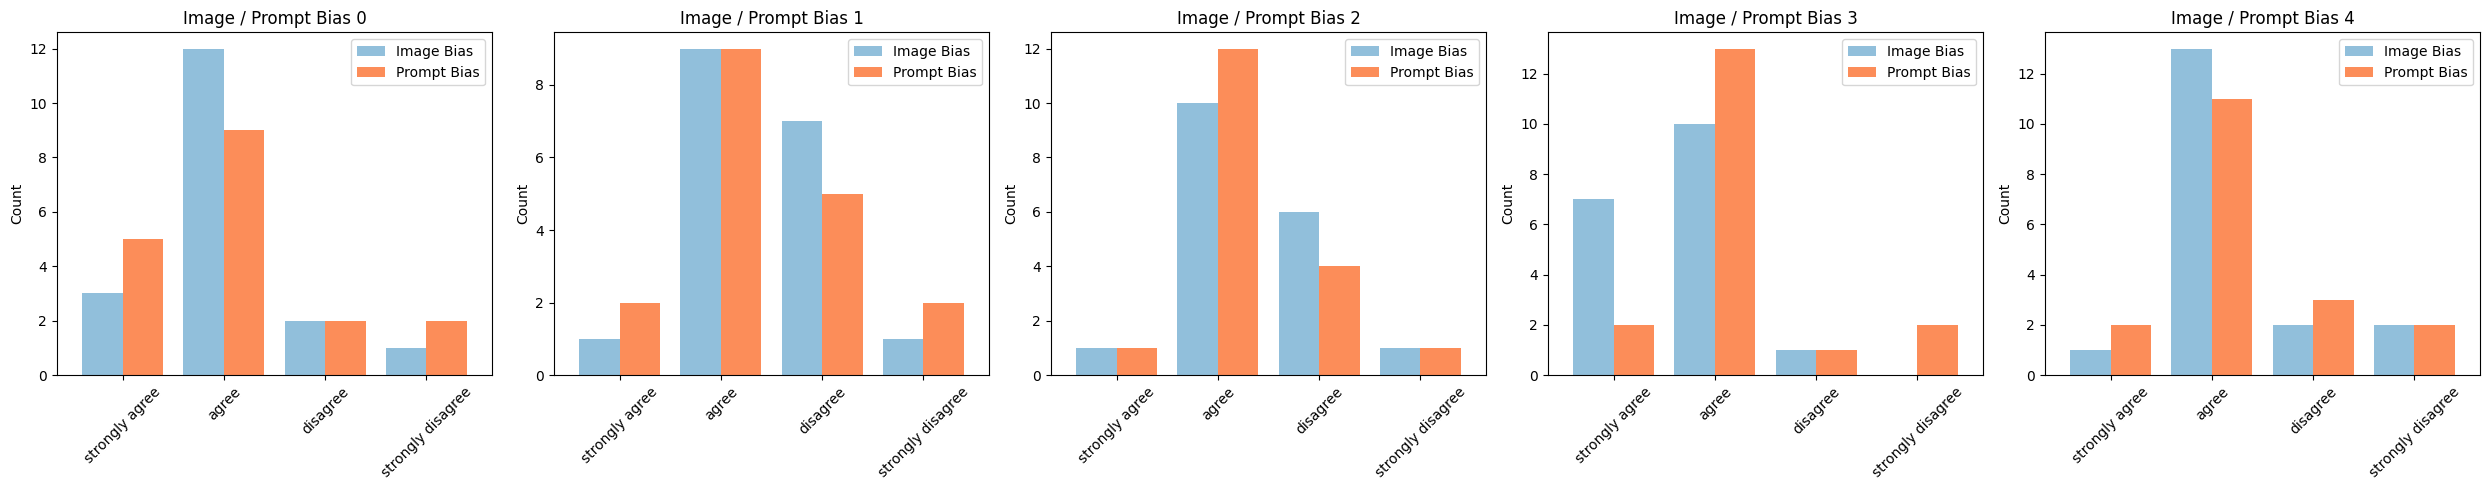

In [272]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd # Import pandas here

custom_colors = ['#91bfdb', '#fc8d59']


image_bias_cols = ["Image Bias", "Image Bias.1", "Image Bias.2", "Image Bias.3", "Image Bias.4"]
prompt_bias_cols = ["Prompt Bias", "Prompt Bias.1", "Prompt Bias.2", "Prompt Bias.3", "Prompt Bias.4"]

fig, axes = plt.subplots(1, 5, figsize=(25, 5)) # Changed to 1 row and 5 columns
axes = axes.flatten() # Flatten the 1x5 array of axes

desired_order = ['strongly agree', 'agree', 'disagree', 'strongly disagree'] # Define the desired order

for i in range(5):
    img_col = image_bias_cols[i]
    prmpt_col = prompt_bias_cols[i]

    if img_col in df.columns and prmpt_col in df.columns:
        img_counts = df[img_col].value_counts()
        prmpt_counts = df[prmpt_col].value_counts()

        # Combine counts and align indices, then reindex to the desired order
        combined_counts = pd.DataFrame({'Image Bias': img_counts, 'Prompt Bias': prmpt_counts}).fillna(0).reindex(desired_order).fillna(0)


        combined_counts.plot(kind='bar', ax=axes[i], width=0.8, color=custom_colors)
        axes[i].set_title(f'Image / Prompt Bias {i}') # Updated title format
        axes[i].set_ylabel('Count')
        axes[i].tick_params(axis='x', rotation=45)
        axes[i].legend()
    else:
        if img_col not in df.columns:
            print(f"Column '{img_col}' not found in the DataFrame.")
        if prmpt_col not in df.columns:
            print(f"Column '{prmpt_col}' not found in the DataFrame.")

plt.tight_layout()
plt.savefig("/content/drive/MyDrive/ethics-project-images/results_questionnaire/plots/aggregates/image-prompt-bias.png", dpi=300)
plt.show()

In [185]:
relevant_cols = ['Sex', 'Age', 'Image Bias', 'Image Bias.1', 'Image Bias.2', 'Image Bias.3', 'Image Bias.4', 'Prompt Bias', 'Prompt Bias.1', 'Prompt Bias.2', 'Prompt Bias.3', 'Prompt Bias.4']
df_analysis = df_combined_filtered[relevant_cols].copy()
display(df_analysis.head())
df_analysis.info()

,Sex,Age,Image Bias,Image Bias.1,Image Bias.2,Image Bias.3,Image Bias.4,Prompt Bias,Prompt Bias.1,Prompt Bias.2,Prompt Bias.3,Prompt Bias.4
0,female,30 to 34 years old,agree,disagree,agree,agree,agree,agree,agree,agree,agree,agree
1,male,25 to 29 years old,agree,agree,disagree,agree,disagree,agree,agree,agree,agree,agree
2,female,18 to 24 years old,strongly agree,agree,strongly agree,strongly agree,strongly agree,strongly disagree,strongly disagree,strongly disagree,agree,strongly disagree
3,male,25 to 29 years old,agree,agree,agree,agree,agree,agree,agree,agree,agree,agree
4,female,30 to 34 years old,agree,agree,agree,agree,agree,strongly agree,agree,agree,strongly agree,strongly agree


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sex            18 non-null     object
 1   Age            18 non-null     object
 2   Image Bias     18 non-null     object
 3   Image Bias.1   18 non-null     object
 4   Image Bias.2   18 non-null     object
 5   Image Bias.3   18 non-null     object
 6   Image Bias.4   18 non-null     object
 7   Prompt Bias    18 non-null     object
 8   Prompt Bias.1  18 non-null     object
 9   Prompt Bias.2  18 non-null     object
 10  Prompt Bias.3  18 non-null     object
 11  Prompt Bias.4  18 non-null     object
dtypes: object(12)
memory usage: 1.8+ KB


In [209]:
image_bias_cols = ['Image Bias', 'Image Bias.1', 'Image Bias.2', 'Image Bias.3', 'Image Bias.4']
prompt_bias_cols = ['Prompt Bias', 'Prompt Bias.1', 'Prompt Bias.2', 'Prompt Bias.3', 'Prompt Bias.4']
desired_order = ['strongly agree', 'agree', 'disagree', 'strongly disagree']

age_bias_counts = {}

# Analyze individual Image Bias columns by Age
for col in image_bias_cols:
    if col in df_analysis.columns:
        age_bias_counts[col] = df_analysis.groupby('Age')[col].value_counts().unstack(fill_value=0).reindex(columns=desired_order, fill_value=0)
        age_bias_counts[f'{col} Normalized'] = age_bias_counts[col].apply(lambda x: x / x.sum(), axis=1)


# Analyze individual Prompt Bias columns by Age
for col in prompt_bias_cols:
    if col in df_analysis.columns:
        age_bias_counts[col] = df_analysis.groupby('Age')[col].value_counts().unstack(fill_value=0).reindex(columns=desired_order, fill_value=0)
        age_bias_counts[f'{col} Normalized'] = age_bias_counts[col].apply(lambda x: x / x.sum(), axis=1)


for col, counts_df in age_bias_counts.items():
    print(f"Response distribution for {col} by Age:")
    display(counts_df)

Response distribution for Image Bias by Age:


Image Bias,strongly agree,agree,disagree,strongly disagree
Age,,,,
18 to 24 years old,2,2,1,0
25 to 29 years old,1,8,1,1
30 to 34 years old,0,2,0,0


Response distribution for Image Bias Normalized by Age:


Image Bias,strongly agree,agree,disagree,strongly disagree
Age,,,,
18 to 24 years old,0.400000,0.400000,0.200000,0.000000
25 to 29 years old,0.090909,0.727273,0.090909,0.090909
30 to 34 years old,0.000000,1.000000,0.000000,0.000000


Response distribution for Image Bias.1 by Age:


Image Bias.1,strongly agree,agree,disagree,strongly disagree
Age,,,,
18 to 24 years old,1,2,2,0
25 to 29 years old,0,6,4,1
30 to 34 years old,0,1,1,0


Response distribution for Image Bias.1 Normalized by Age:


Image Bias.1,strongly agree,agree,disagree,strongly disagree
Age,,,,
18 to 24 years old,0.2,0.400000,0.400000,0.000000
25 to 29 years old,0.0,0.545455,0.363636,0.090909
30 to 34 years old,0.0,0.500000,0.500000,0.000000


Response distribution for Image Bias.2 by Age:


Image Bias.2,strongly agree,agree,disagree,strongly disagree
Age,,,,
18 to 24 years old,1,3,1,0
25 to 29 years old,0,5,5,1
30 to 34 years old,0,2,0,0


Response distribution for Image Bias.2 Normalized by Age:


Image Bias.2,strongly agree,agree,disagree,strongly disagree
Age,,,,
18 to 24 years old,0.2,0.600000,0.200000,0.000000
25 to 29 years old,0.0,0.454545,0.454545,0.090909
30 to 34 years old,0.0,1.000000,0.000000,0.000000


Response distribution for Image Bias.3 by Age:


Image Bias.3,strongly agree,agree,disagree,strongly disagree
Age,,,,
18 to 24 years old,3,2,0,0
25 to 29 years old,4,6,1,0
30 to 34 years old,0,2,0,0


Response distribution for Image Bias.3 Normalized by Age:


Image Bias.3,strongly agree,agree,disagree,strongly disagree
Age,,,,
18 to 24 years old,0.600000,0.400000,0.000000,0.0
25 to 29 years old,0.363636,0.545455,0.090909,0.0
30 to 34 years old,0.000000,1.000000,0.000000,0.0


Response distribution for Image Bias.4 by Age:


Image Bias.4,strongly agree,agree,disagree,strongly disagree
Age,,,,
18 to 24 years old,1,4,0,0
25 to 29 years old,0,7,2,2
30 to 34 years old,0,2,0,0


Response distribution for Image Bias.4 Normalized by Age:


Image Bias.4,strongly agree,agree,disagree,strongly disagree
Age,,,,
18 to 24 years old,0.2,0.800000,0.000000,0.000000
25 to 29 years old,0.0,0.636364,0.181818,0.181818
30 to 34 years old,0.0,1.000000,0.000000,0.000000


Response distribution for Prompt Bias by Age:


Prompt Bias,strongly agree,agree,disagree,strongly disagree
Age,,,,
18 to 24 years old,1,2,0,2
25 to 29 years old,3,6,2,0
30 to 34 years old,1,1,0,0


Response distribution for Prompt Bias Normalized by Age:


Prompt Bias,strongly agree,agree,disagree,strongly disagree
Age,,,,
18 to 24 years old,0.200000,0.400000,0.000000,0.4
25 to 29 years old,0.272727,0.545455,0.181818,0.0
30 to 34 years old,0.500000,0.500000,0.000000,0.0


Response distribution for Prompt Bias.1 by Age:


Prompt Bias.1,strongly agree,agree,disagree,strongly disagree
Age,,,,
18 to 24 years old,1,1,2,1
25 to 29 years old,1,6,3,1
30 to 34 years old,0,2,0,0


Response distribution for Prompt Bias.1 Normalized by Age:


Prompt Bias.1,strongly agree,agree,disagree,strongly disagree
Age,,,,
18 to 24 years old,0.200000,0.200000,0.400000,0.200000
25 to 29 years old,0.090909,0.545455,0.272727,0.090909
30 to 34 years old,0.000000,1.000000,0.000000,0.000000


Response distribution for Prompt Bias.2 by Age:


Prompt Bias.2,strongly agree,agree,disagree,strongly disagree
Age,,,,
18 to 24 years old,1,2,1,1
25 to 29 years old,0,8,3,0
30 to 34 years old,0,2,0,0


Response distribution for Prompt Bias.2 Normalized by Age:


Prompt Bias.2,strongly agree,agree,disagree,strongly disagree
Age,,,,
18 to 24 years old,0.2,0.400000,0.200000,0.2
25 to 29 years old,0.0,0.727273,0.272727,0.0
30 to 34 years old,0.0,1.000000,0.000000,0.0


Response distribution for Prompt Bias.3 by Age:


Prompt Bias.3,strongly agree,agree,disagree,strongly disagree
Age,,,,
18 to 24 years old,1,3,1,0
25 to 29 years old,0,9,0,2
30 to 34 years old,1,1,0,0


Response distribution for Prompt Bias.3 Normalized by Age:


Prompt Bias.3,strongly agree,agree,disagree,strongly disagree
Age,,,,
18 to 24 years old,0.2,0.600000,0.2,0.000000
25 to 29 years old,0.0,0.818182,0.0,0.181818
30 to 34 years old,0.5,0.500000,0.0,0.000000


Response distribution for Prompt Bias.4 by Age:


Prompt Bias.4,strongly agree,agree,disagree,strongly disagree
Age,,,,
18 to 24 years old,1,2,0,2
25 to 29 years old,0,8,3,0
30 to 34 years old,1,1,0,0


Response distribution for Prompt Bias.4 Normalized by Age:


Prompt Bias.4,strongly agree,agree,disagree,strongly disagree
Age,,,,
18 to 24 years old,0.2,0.400000,0.000000,0.4
25 to 29 years old,0.0,0.727273,0.272727,0.0
30 to 34 years old,0.5,0.500000,0.000000,0.0


In [210]:
image_bias_cols = ['Image Bias', 'Image Bias.1', 'Image Bias.2', 'Image Bias.3', 'Image Bias.4']
prompt_bias_cols = ['Prompt Bias', 'Prompt Bias.1', 'Prompt Bias.2', 'Prompt Bias.3', 'Prompt Bias.4']
desired_order = ['strongly agree', 'agree', 'disagree', 'strongly disagree']

sex_bias_counts = {}

# Analyze individual Image Bias columns by Sex
for col in image_bias_cols:
    if col in df_analysis.columns:
        sex_bias_counts[col] = df_analysis.groupby('Sex')[col].value_counts().unstack(fill_value=0).reindex(columns=desired_order, fill_value=0)
        sex_bias_counts[f'{col} Normalized'] = sex_bias_counts[col].apply(lambda x: x / x.sum(), axis=1)

# Analyze individual Prompt Bias columns by Sex
for col in prompt_bias_cols:
    if col in df_analysis.columns:
        sex_bias_counts[col] = df_analysis.groupby('Sex')[col].value_counts().unstack(fill_value=0).reindex(columns=desired_order, fill_value=0)
        sex_bias_counts[f'{col} Normalized'] = sex_bias_counts[col].apply(lambda x: x / x.sum(), axis=1)


for col, counts_df in sex_bias_counts.items():
    print(f"Response distribution for {col} by Sex:")
    display(counts_df)

Response distribution for Image Bias by Sex:


Image Bias,strongly agree,agree,disagree,strongly disagree
Sex,,,,
female,3,6,0,0
male,0,6,2,1


Response distribution for Image Bias Normalized by Sex:


Image Bias,strongly agree,agree,disagree,strongly disagree
Sex,,,,
female,0.333333,0.666667,0.000000,0.000000
male,0.000000,0.666667,0.222222,0.111111


Response distribution for Image Bias.1 by Sex:


Image Bias.1,strongly agree,agree,disagree,strongly disagree
Sex,,,,
female,1,6,2,0
male,0,3,5,1


Response distribution for Image Bias.1 Normalized by Sex:


Image Bias.1,strongly agree,agree,disagree,strongly disagree
Sex,,,,
female,0.111111,0.666667,0.222222,0.000000
male,0.000000,0.333333,0.555556,0.111111


Response distribution for Image Bias.2 by Sex:


Image Bias.2,strongly agree,agree,disagree,strongly disagree
Sex,,,,
female,1,6,2,0
male,0,4,4,1


Response distribution for Image Bias.2 Normalized by Sex:


Image Bias.2,strongly agree,agree,disagree,strongly disagree
Sex,,,,
female,0.111111,0.666667,0.222222,0.000000
male,0.000000,0.444444,0.444444,0.111111


Response distribution for Image Bias.3 by Sex:


Image Bias.3,strongly agree,agree,disagree,strongly disagree
Sex,,,,
female,5,4,0,0
male,2,6,1,0


Response distribution for Image Bias.3 Normalized by Sex:


Image Bias.3,strongly agree,agree,disagree,strongly disagree
Sex,,,,
female,0.555556,0.444444,0.000000,0.0
male,0.222222,0.666667,0.111111,0.0


Response distribution for Image Bias.4 by Sex:


Image Bias.4,strongly agree,agree,disagree,strongly disagree
Sex,,,,
female,1,8,0,0
male,0,5,2,2


Response distribution for Image Bias.4 Normalized by Sex:


Image Bias.4,strongly agree,agree,disagree,strongly disagree
Sex,,,,
female,0.111111,0.888889,0.000000,0.000000
male,0.000000,0.555556,0.222222,0.222222


Response distribution for Prompt Bias by Sex:


Prompt Bias,strongly agree,agree,disagree,strongly disagree
Sex,,,,
female,3,4,1,1
male,2,5,1,1


Response distribution for Prompt Bias Normalized by Sex:


Prompt Bias,strongly agree,agree,disagree,strongly disagree
Sex,,,,
female,0.333333,0.444444,0.111111,0.111111
male,0.222222,0.555556,0.111111,0.111111


Response distribution for Prompt Bias.1 by Sex:


Prompt Bias.1,strongly agree,agree,disagree,strongly disagree
Sex,,,,
female,1,5,2,1
male,1,4,3,1


Response distribution for Prompt Bias.1 Normalized by Sex:


Prompt Bias.1,strongly agree,agree,disagree,strongly disagree
Sex,,,,
female,0.111111,0.555556,0.222222,0.111111
male,0.111111,0.444444,0.333333,0.111111


Response distribution for Prompt Bias.2 by Sex:


Prompt Bias.2,strongly agree,agree,disagree,strongly disagree
Sex,,,,
female,1,5,2,1
male,0,7,2,0


Response distribution for Prompt Bias.2 Normalized by Sex:


Prompt Bias.2,strongly agree,agree,disagree,strongly disagree
Sex,,,,
female,0.111111,0.555556,0.222222,0.111111
male,0.000000,0.777778,0.222222,0.000000


Response distribution for Prompt Bias.3 by Sex:


Prompt Bias.3,strongly agree,agree,disagree,strongly disagree
Sex,,,,
female,1,8,0,0
male,1,5,1,2


Response distribution for Prompt Bias.3 Normalized by Sex:


Prompt Bias.3,strongly agree,agree,disagree,strongly disagree
Sex,,,,
female,0.111111,0.888889,0.000000,0.000000
male,0.111111,0.555556,0.111111,0.222222


Response distribution for Prompt Bias.4 by Sex:


Prompt Bias.4,strongly agree,agree,disagree,strongly disagree
Sex,,,,
female,2,4,2,1
male,0,7,1,1


Response distribution for Prompt Bias.4 Normalized by Sex:


Prompt Bias.4,strongly agree,agree,disagree,strongly disagree
Sex,,,,
female,0.222222,0.444444,0.222222,0.111111
male,0.000000,0.777778,0.111111,0.111111


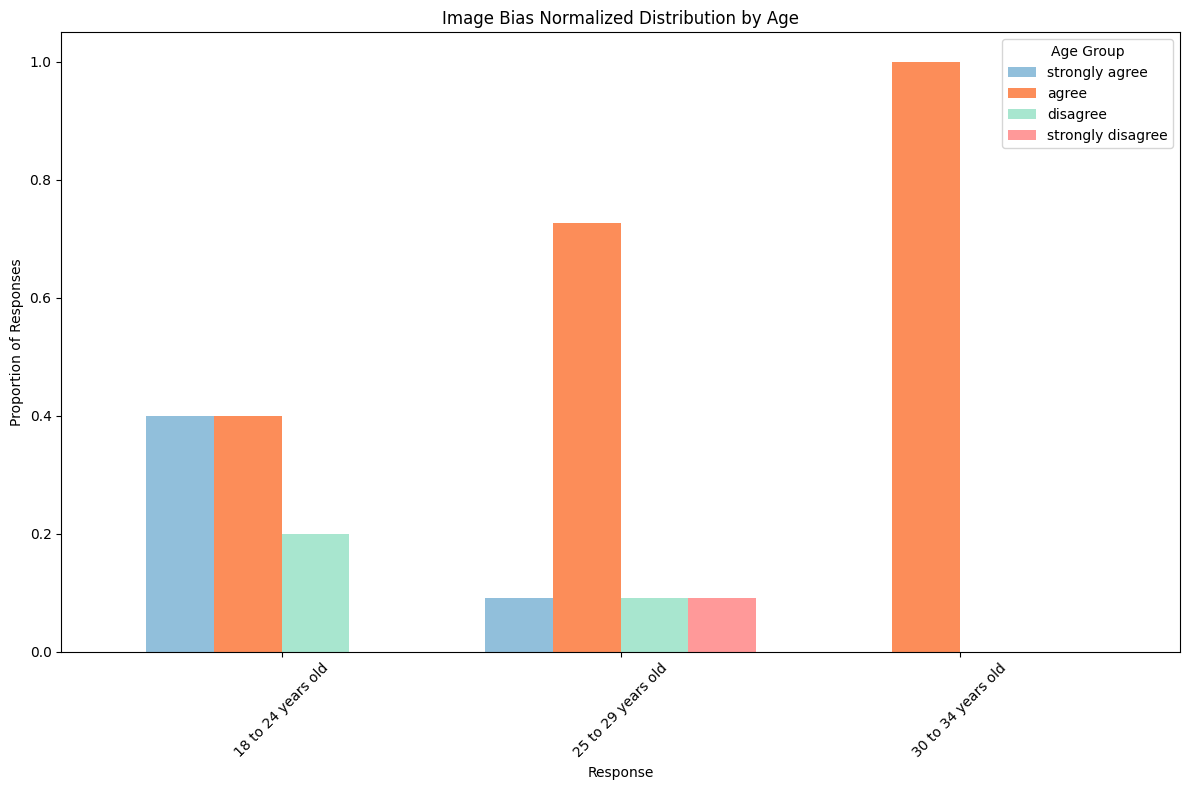

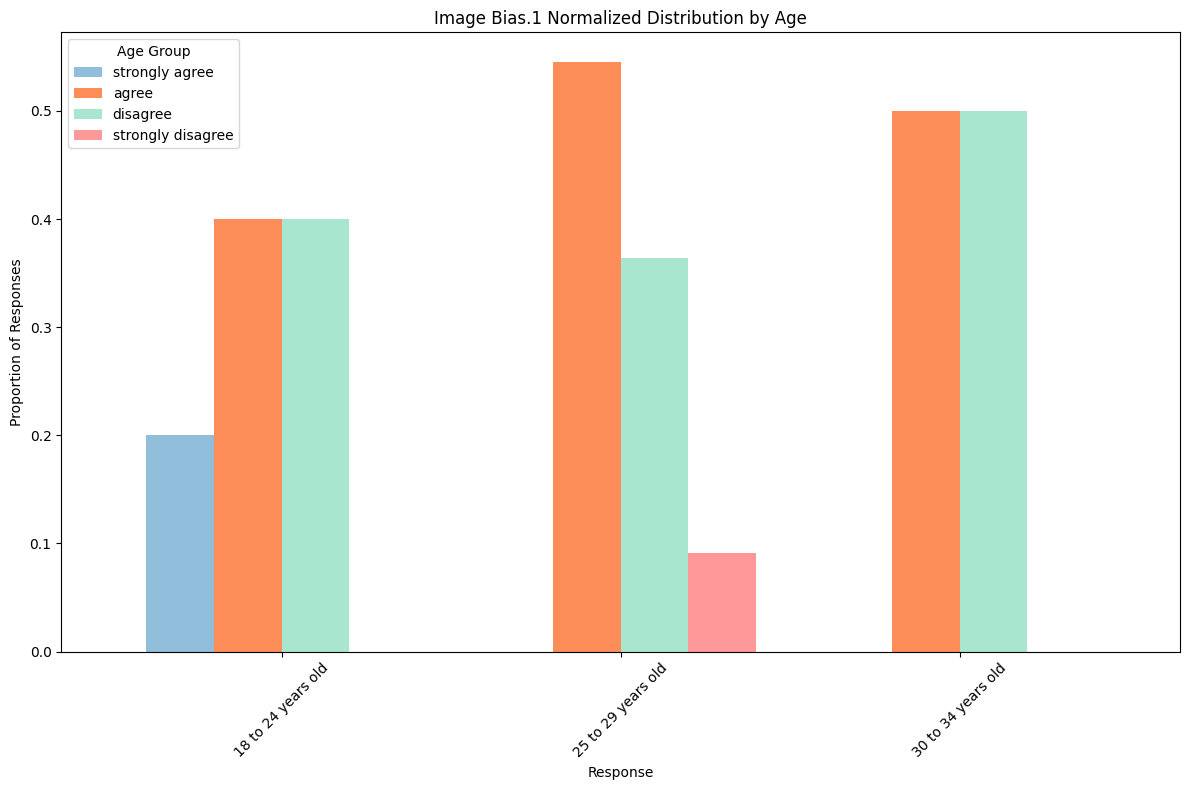

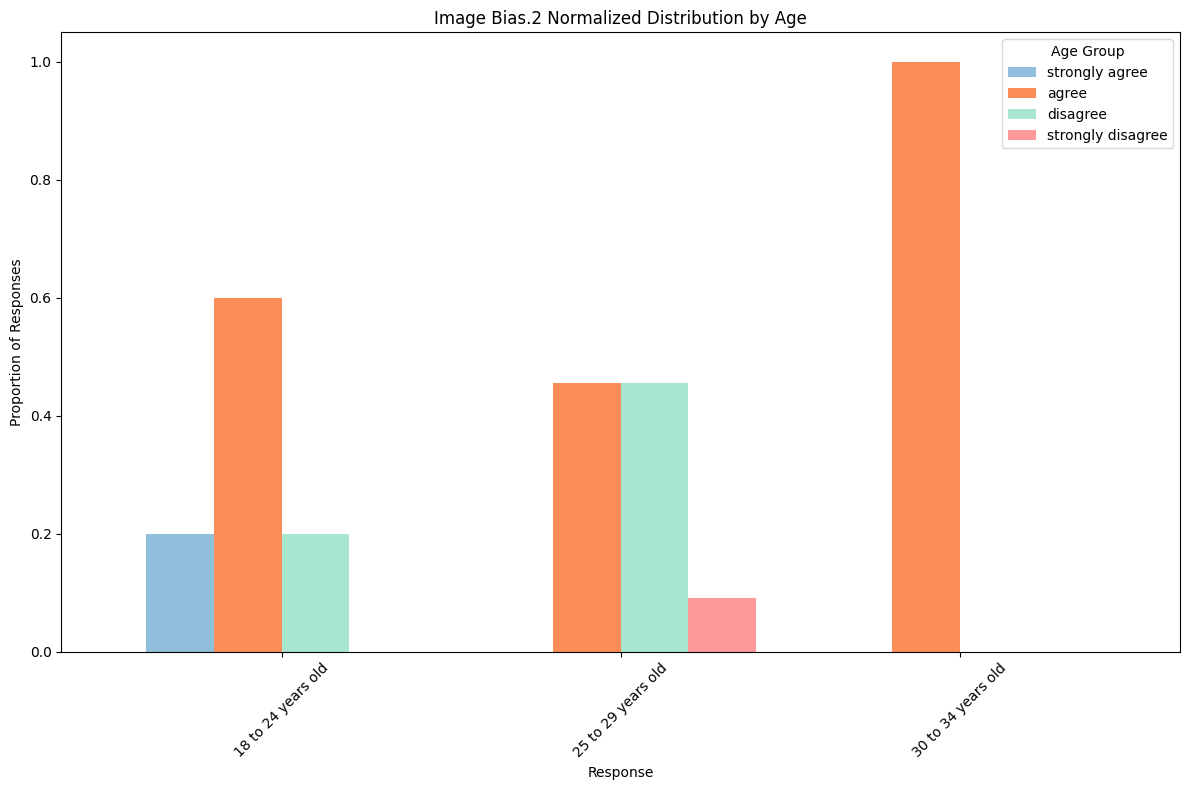

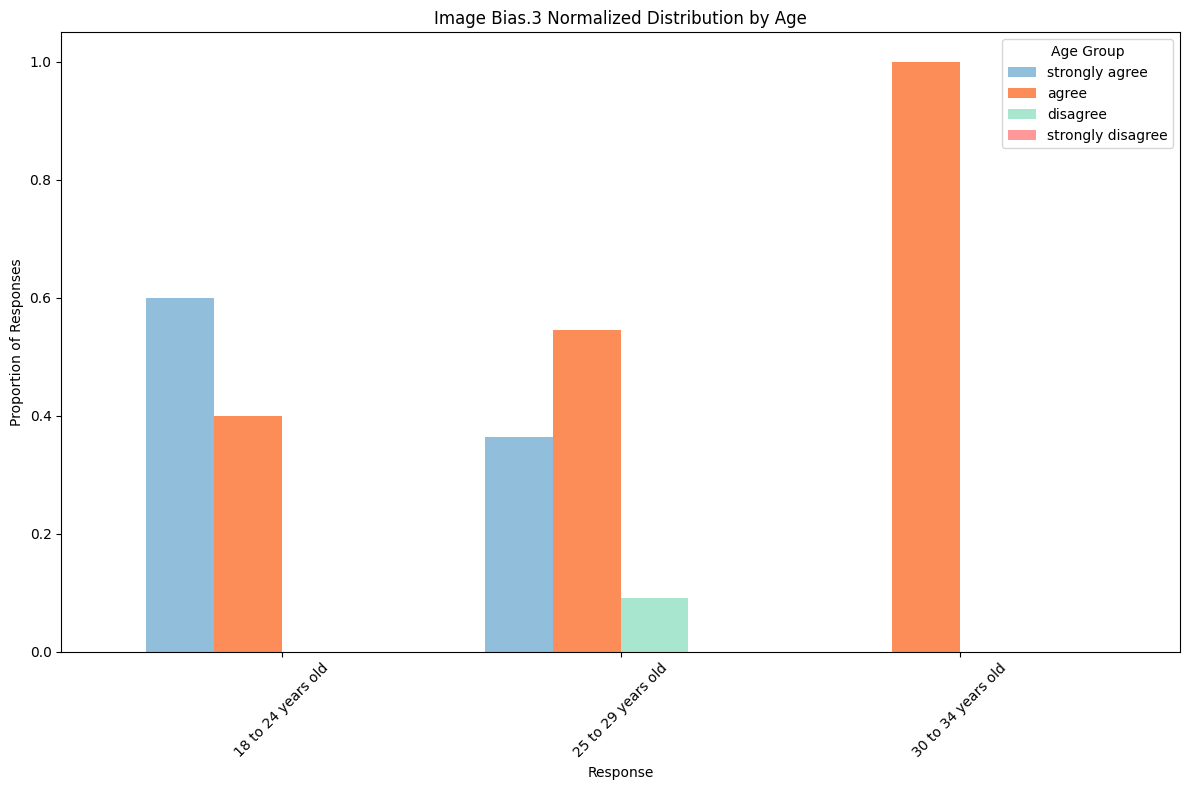

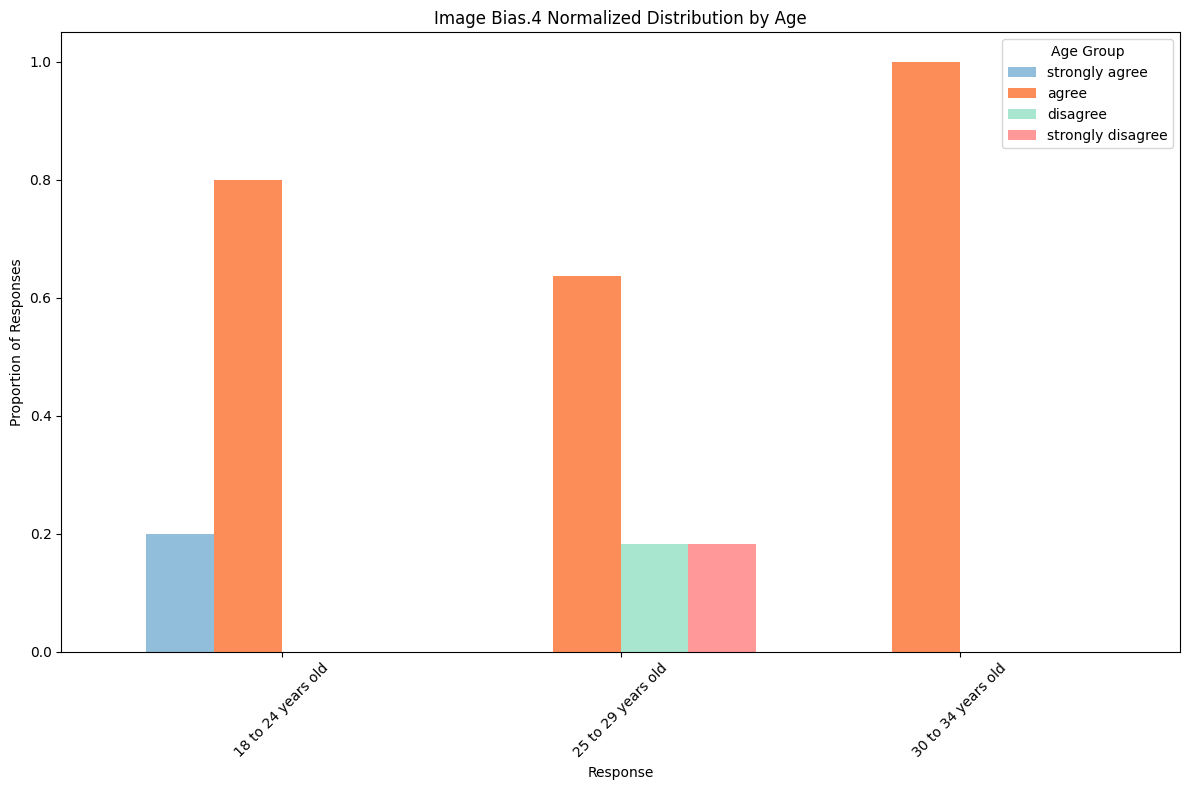

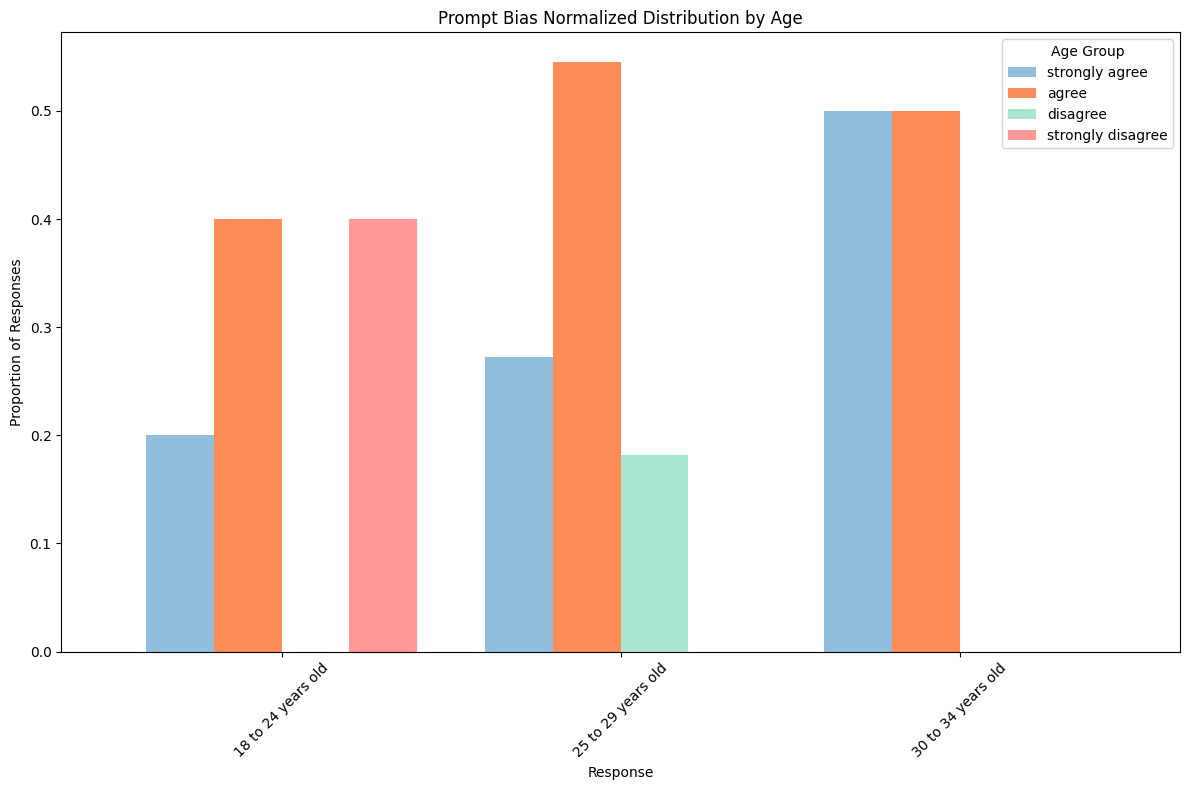

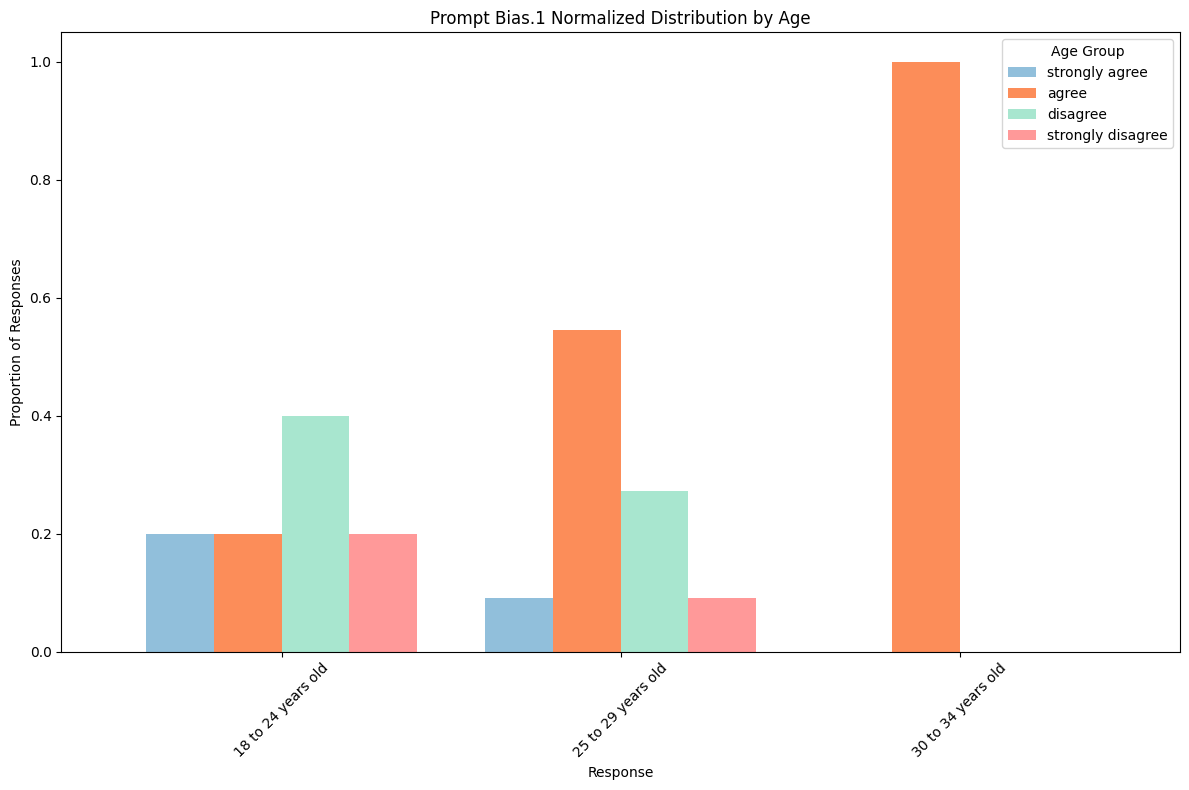

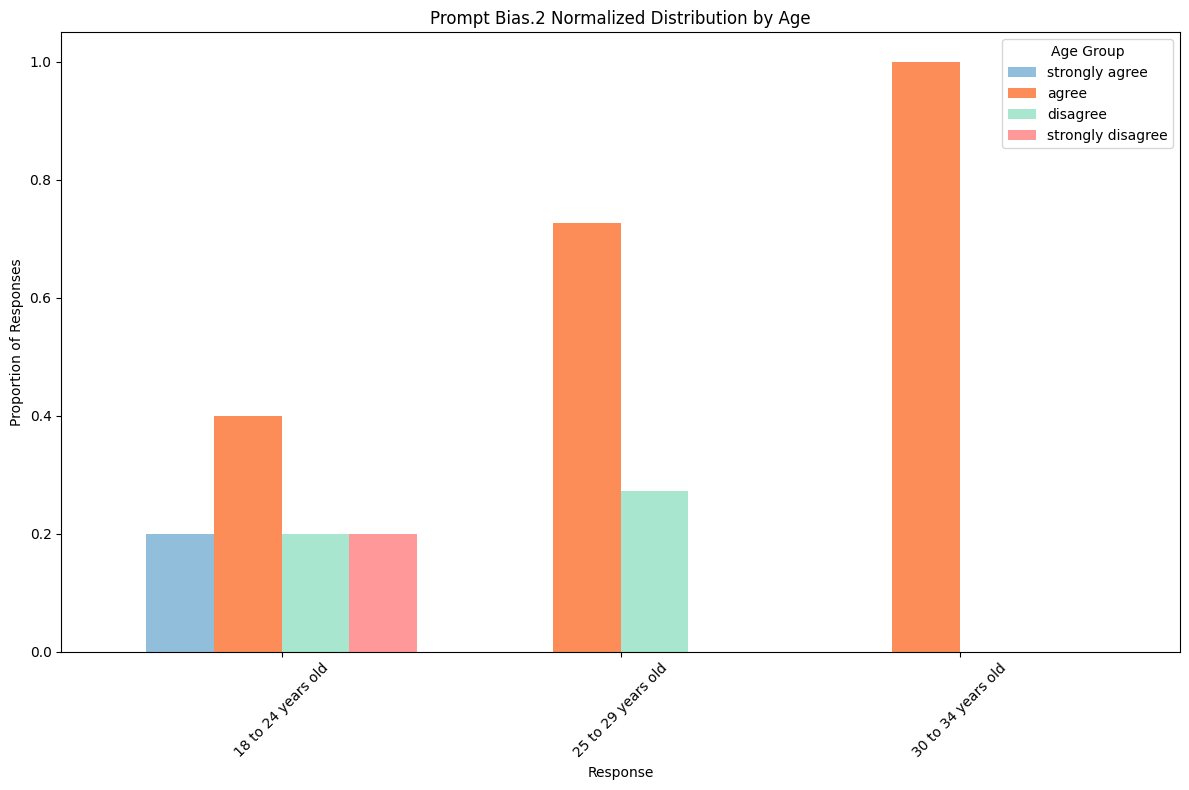

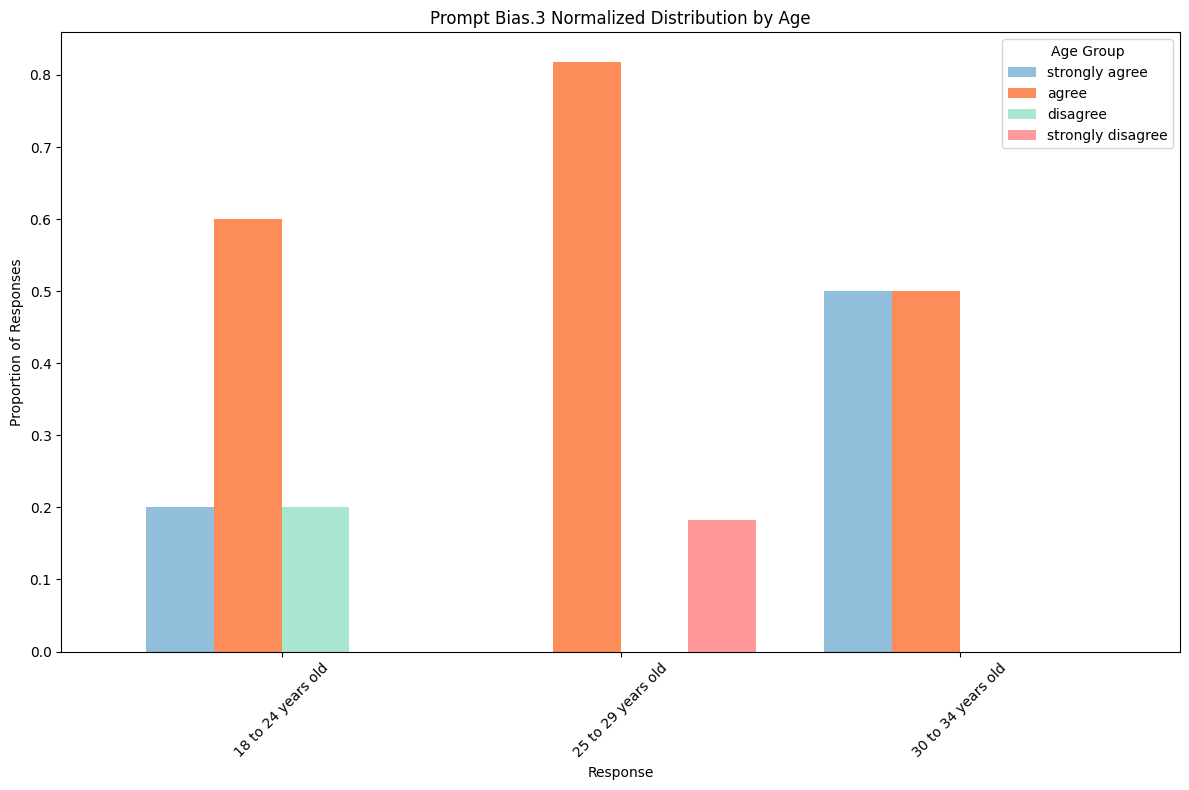

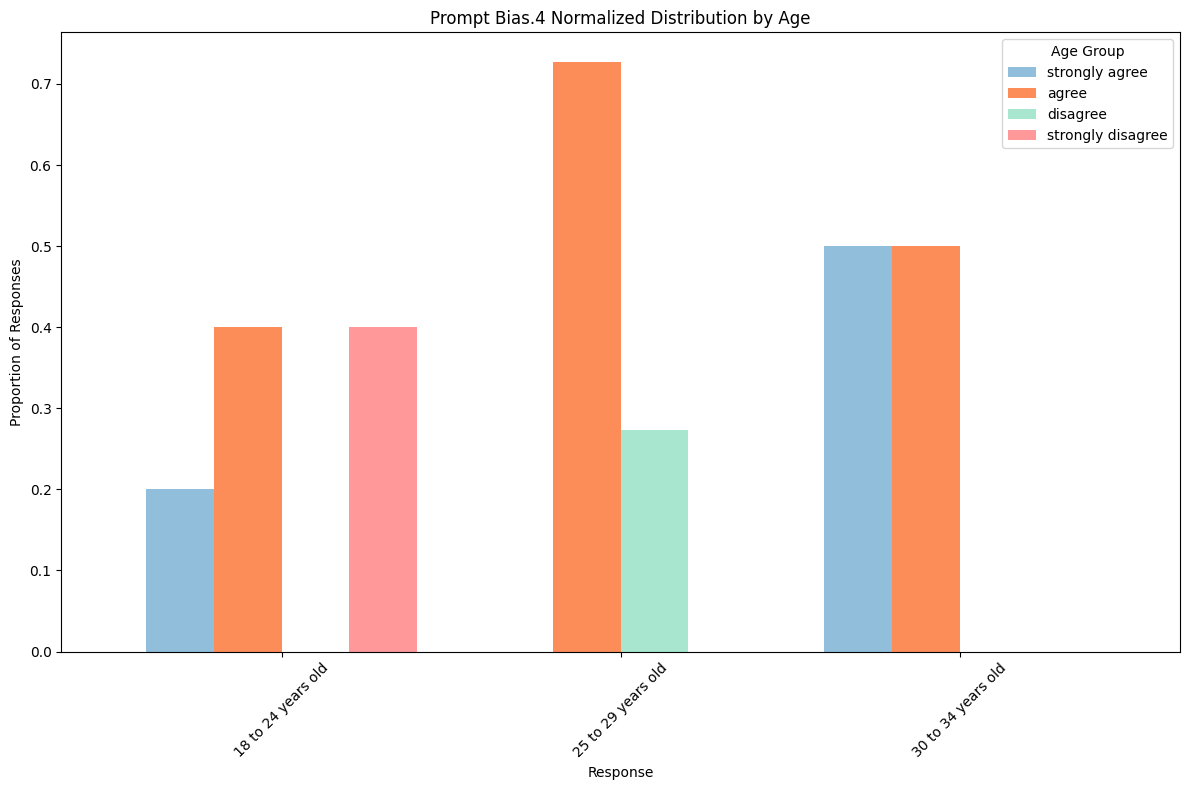

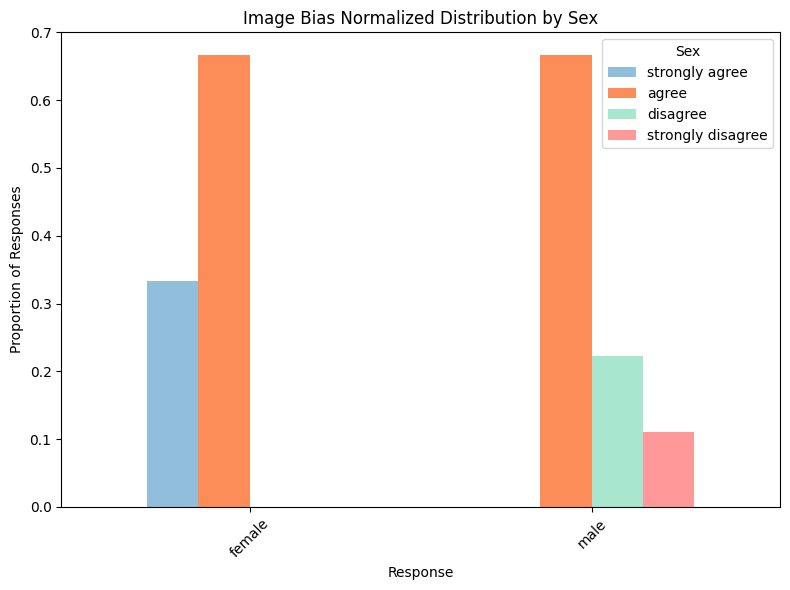

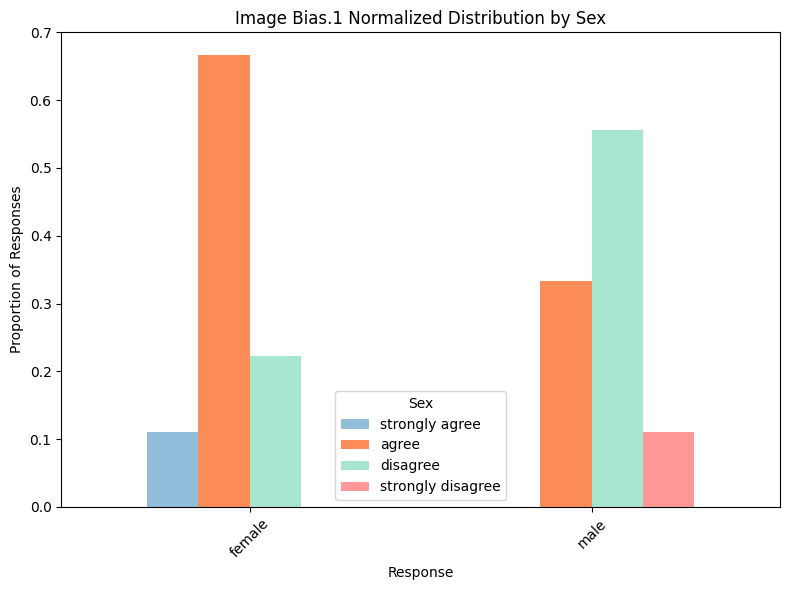

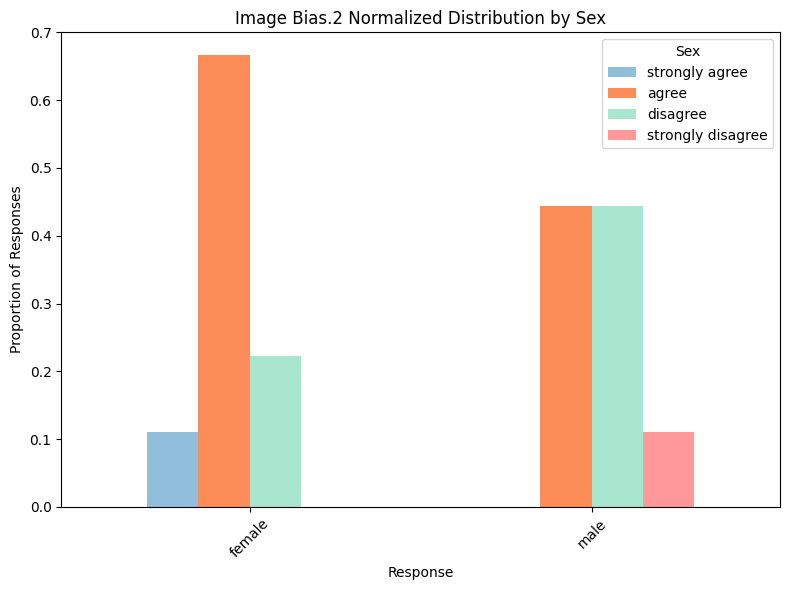

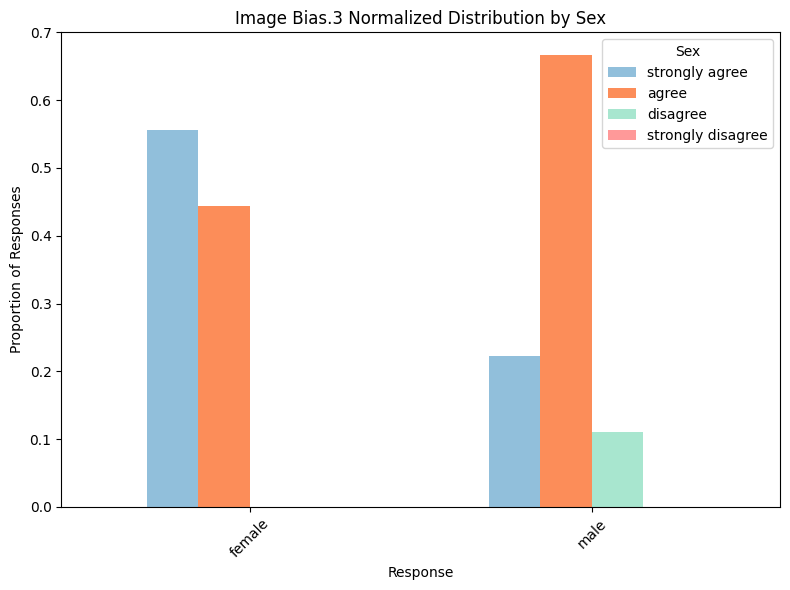

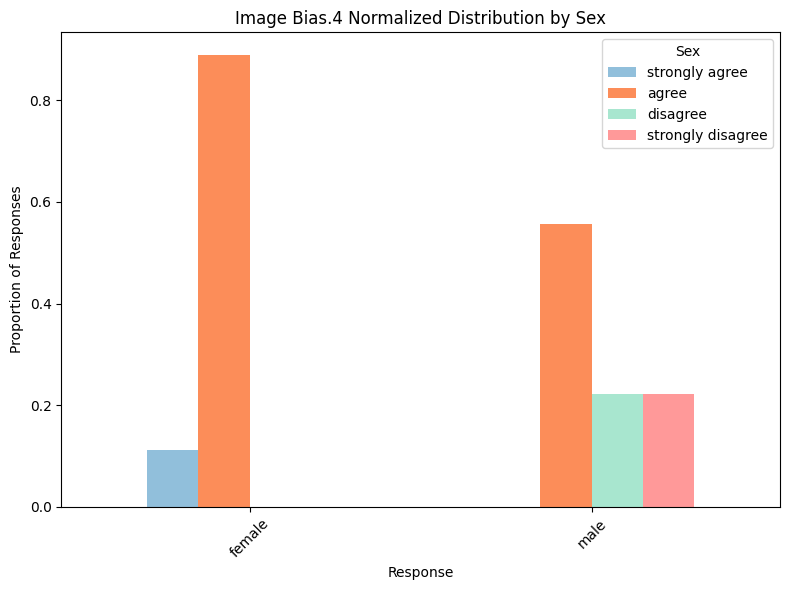

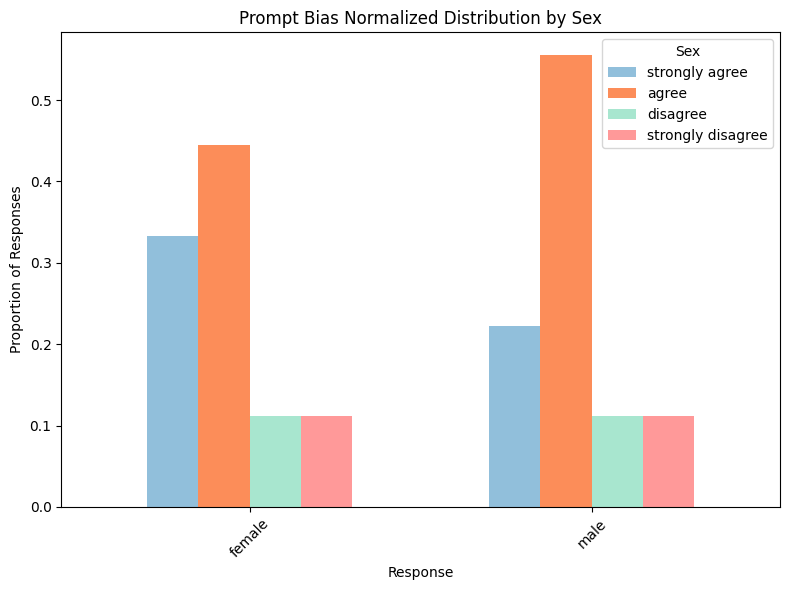

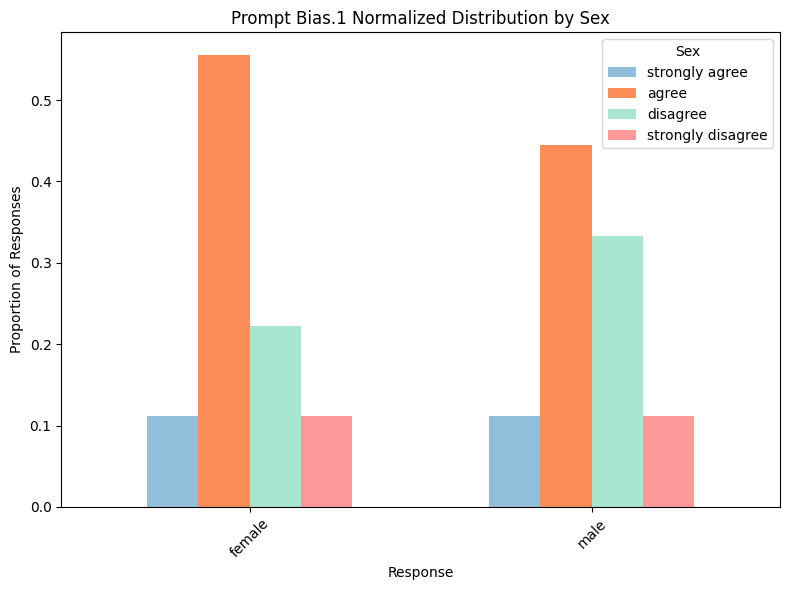

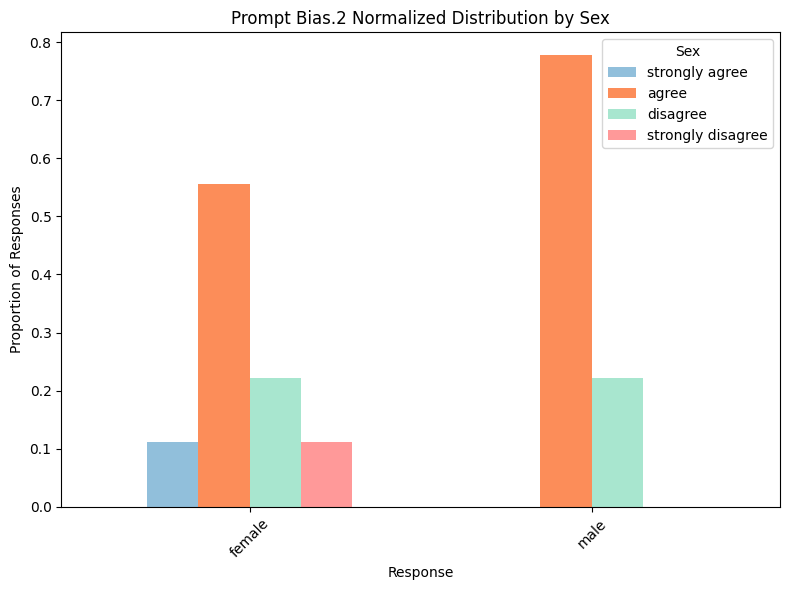

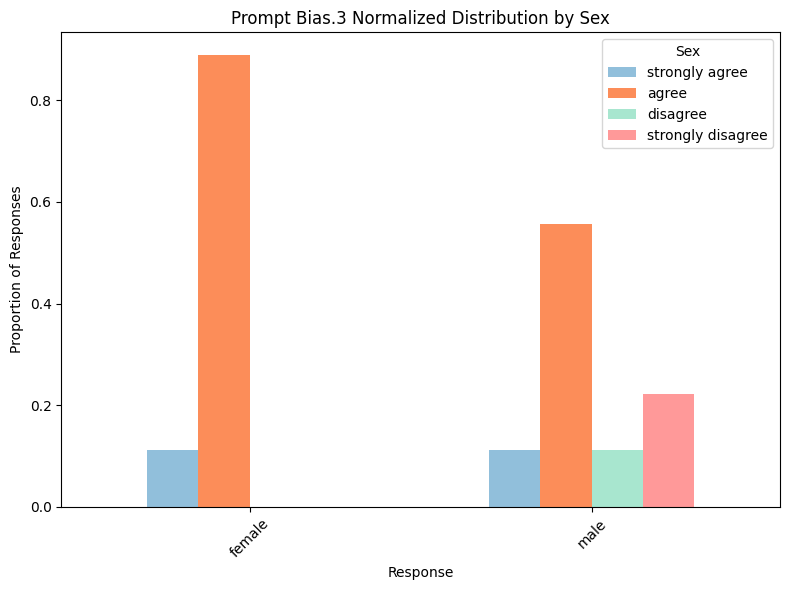

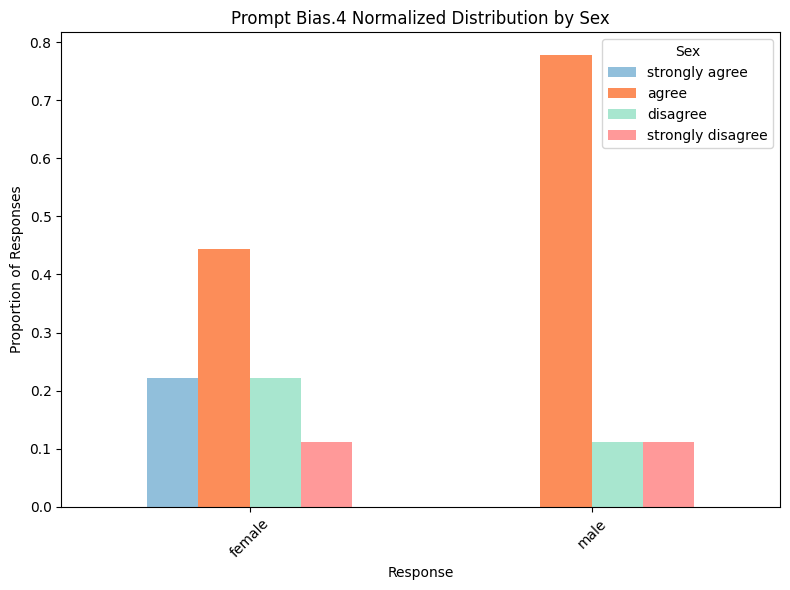

In [270]:
desired_order = ['strongly agree', 'agree', 'disagree', 'strongly disagree'] # Define the desired order
custom_colors = ['#91bfdb', '#fc8d59', '#a8e6cf', '#ff9999']

# Plotting age bias counts for individual columns
for col, counts_df in age_bias_counts.items():
    if "Normalized" in col:
        ax = counts_df.plot(kind='bar', figsize=(12, 8), width=0.8, color=custom_colors)
        ax.set_title(f'{col} Distribution by Age')
        ax.set_xlabel('Response')
        ax.set_ylabel('Proportion of Responses')
        ax.tick_params(axis='x', rotation=45)
        ax.legend(title='Age Group')
        plt.tight_layout()
        plt.savefig(f"/content/drive/MyDrive/ethics-project-images/results_questionnaire/plots/individual/{col.replace(' ', '_')}_by_age_normalized.png", dpi=300)
        plt.show()

# Plotting sex bias counts for individual columns
for col, counts_df in sex_bias_counts.items():
     if "Normalized" in col:
        ax = counts_df.plot(kind='bar', figsize=(8, 6), width=0.6, color=custom_colors)
        ax.set_title(f'{col} Distribution by Sex')
        ax.set_xlabel('Response')
        ax.set_ylabel('Proportion of Responses')
        ax.tick_params(axis='x', rotation=45)
        ax.legend(title='Sex')
        plt.tight_layout()
        plt.savefig(f"/content/drive/MyDrive/ethics-project-images/results_questionnaire/plots/individual/{col.replace(' ', '_')}_by_sex_normalized.png", dpi=300)
        plt.show()

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
custom_colors = ['#91bfdb', '#fc8d59', '#a8e6cf', '#ff9999']

desired_order = ['strongly agree', 'agree', 'disagree', 'strongly disagree']

if 'All Bias Responses Normalized' in age_response_distribution:
    counts_df = age_response_distribution['All Bias Responses Normalized'].reindex(columns=desired_order, fill_value=0)
    ax = counts_df.plot(kind='bar', figsize=(12, 8), width=0.8, color=custom_colors)
    ax.set_title(f'Normalized Overall Response Distribution by Age')
    ax.set_xlabel('Response')
    ax.set_ylabel('Proportion of Responses')
    ax.tick_params(axis='x', rotation=45)
    ax.legend(title='Age Group')
    plt.tight_layout()
    plt.savefig(f"/content/drive/MyDrive/ethics-project-images/results_questionnaire/plots/aggregates/age_response_distribution_all_bias_normalized.png", dpi=300)
    plt.show()
elif 'All Bias Responses' in age_response_distribution:
    counts_df = age_response_distribution['All Bias Responses'].reindex(columns=desired_order, fill_value=0)
    ax = counts_df.plot(kind='bar', figsize=(12, 8), width=0.8)
    ax.set_title(f'Overall Response Distribution by Age')
    ax.set_xlabel('Response')
    ax.set_ylabel('Total Count Across all Bias Questions')
    ax.tick_params(axis='x', rotation=45)
    ax.legend(title='Age Group')
    plt.tight_layout()
    plt.savefig(f"/content/drive/MyDrive/ethics-project-images/results_questionnaire/plots/aggregates/age_response_distribution_all_bias.png", dpi=300)
    plt.show()
else:
    print("Normalized or raw age response distribution data not found.")

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
custom_colors = ['#91bfdb', '#fc8d59', '#a8e6cf', '#ff9999']

desired_order = ['strongly agree', 'agree', 'disagree', 'strongly disagree']

if 'All Bias Responses Normalized' in sex_response_distribution:
     counts_df = sex_response_distribution['All Bias Responses Normalized'].reindex(columns=desired_order, fill_value=0)
     ax = counts_df.plot(kind='bar', figsize=(8, 6), width=0.6, color=custom_colors)
     ax.set_title(f'Normalized Overall Response Distribution by Sex')
     ax.set_xlabel('Response')
     ax.set_ylabel('Proportion of Responses')
     ax.tick_params(axis='x', rotation=45)
     ax.legend(title='Sex')
     plt.tight_layout()
     plt.savefig(f"/content/drive/MyDrive/ethics-project-images/results_questionnaire/plots/aggregates/sex_response_distribution_all_bias_normalized.png", dpi=300)
     plt.show()
elif 'All Bias Responses' in sex_response_distribution:
     counts_df = sex_response_distribution['All Bias Responses'].reindex(columns=desired_order, fill_value=0)
     ax = counts_df.plot(kind='bar', figsize=(8, 6), width=0.6)
     ax.set_title(f'Overall Response Distribution by Sex')
     ax.set_xlabel('Response')
     ax.set_ylabel('Total Count Across all Bias Questions')
     ax.tick_params(axis='x', rotation=45)
     ax.legend(title='Sex')
     plt.tight_layout()
     plt.savefig(f"/content/drive/MyDrive/ethics-project-images/results_questionnaire/plots/aggregates/sex_response_distribution_all_bias.png", dpi=300)
     plt.show()
else:
    print("Normalized or raw sex response distribution data not found.")

In [217]:
aggregated_bias_cols = ['Aggregated Image Bias', 'Aggregated Prompt Bias', 'Aggregated All Bias']
demographic_cols_to_analyze = ['Sex', 'Age']
contingency_tables_aggregated = {}

for demo_col in demographic_cols_to_analyze:
    for bias_col in aggregated_bias_cols:
        if demo_col in df_analysis.columns and bias_col in df_analysis.columns:
            table = pd.crosstab(df_analysis[demo_col], df_analysis[bias_col])
            table_name = f"{demo_col}_vs_{bias_col}"
            contingency_tables_aggregated[table_name] = table
            print(f"Contingency table for {table_name}:")
            display(table)
        else:
            if demo_col not in df_analysis.columns:
                 print(f"Demographic column '{demo_col}' not found in the DataFrame.")
            if bias_col not in df_analysis.columns:
                 print(f"Bias column '{bias_col}' not found in the DataFrame.")

Contingency table for Sex_vs_Aggregated Image Bias:


Aggregated Image Bias,agree,disagree,strongly agree,strongly disagree
Sex,,,,
female,8,0,1,0
male,5,3,0,1


Contingency table for Sex_vs_Aggregated Prompt Bias:


Aggregated Prompt Bias,agree,disagree,strongly agree,strongly disagree
Sex,,,,
female,5,1,2,1
male,7,2,0,0


Contingency table for Sex_vs_Aggregated All Bias:


Aggregated All Bias,agree,disagree,strongly agree
Sex,,,
female,7,0,2
male,7,2,0


Contingency table for Age_vs_Aggregated Image Bias:


Aggregated Image Bias,agree,disagree,strongly agree,strongly disagree
Age,,,,
18 to 24 years old,3,1,1,0
25 to 29 years old,8,2,0,1
30 to 34 years old,2,0,0,0


Contingency table for Age_vs_Aggregated Prompt Bias:


Aggregated Prompt Bias,agree,disagree,strongly agree,strongly disagree
Age,,,,
18 to 24 years old,2,1,1,1
25 to 29 years old,9,2,0,0
30 to 34 years old,1,0,1,0


Contingency table for Age_vs_Aggregated All Bias:


Aggregated All Bias,agree,disagree,strongly agree
Age,,,
18 to 24 years old,2,1,2
25 to 29 years old,10,1,0
30 to 34 years old,2,0,0


In [218]:
from scipy.stats import chi2_contingency

chi2_results_aggregated = {}

for table_name, table in contingency_tables_aggregated.items():
    chi2, p, dof, expected = chi2_contingency(table)
    chi2_results_aggregated[table_name] = {'chi2_statistic': chi2, 'p_value': p, 'dof': dof}
    print(f"Chi-squared test for {table_name}:")
    print(f"  Chi2 Statistic: {chi2:.4f}")
    print(f"  P-value: {p:.4f}")
    print(f"  Degrees of Freedom: {dof}")
    print("-" * 30)

Chi-squared test for Sex_vs_Aggregated Image Bias:
  Chi2 Statistic: 5.6923
  P-value: 0.1276
  Degrees of Freedom: 3
------------------------------
Chi-squared test for Sex_vs_Aggregated Prompt Bias:
  Chi2 Statistic: 3.6667
  P-value: 0.2998
  Degrees of Freedom: 3
------------------------------
Chi-squared test for Sex_vs_Aggregated All Bias:
  Chi2 Statistic: 4.0000
  P-value: 0.1353
  Degrees of Freedom: 2
------------------------------
Chi-squared test for Age_vs_Aggregated Image Bias:
  Chi2 Statistic: 3.9357
  P-value: 0.6854
  Degrees of Freedom: 6
------------------------------
Chi-squared test for Age_vs_Aggregated Prompt Bias:
  Chi2 Statistic: 8.2773
  P-value: 0.2185
  Degrees of Freedom: 6
------------------------------
Chi-squared test for Age_vs_Aggregated All Bias:
  Chi2 Statistic: 7.1065
  P-value: 0.1304
  Degrees of Freedom: 4
------------------------------


In [219]:
alpha = 0.05

print("Interpretation of Aggregated Chi-squared Test Results:")
print("-" * 50)

for table_name, results in chi2_results_aggregated.items():
    p_value = results['p_value']
    demographic_var, bias_var = table_name.split('_vs_')

    if p_value < alpha:
        print(f"Relationship between {demographic_var} and {bias_var} is statistically significant (p-value = {p_value:.4f})")
    else:
        print(f"Relationship between {demographic_var} and {bias_var} is not statistically significant (p-value = {p_value:.4f})")


Interpretation of Aggregated Chi-squared Test Results:
--------------------------------------------------
Relationship between Sex and Aggregated Image Bias is not statistically significant (p-value = 0.1276)
Relationship between Sex and Aggregated Prompt Bias is not statistically significant (p-value = 0.2998)
Relationship between Sex and Aggregated All Bias is not statistically significant (p-value = 0.1353)
Relationship between Age and Aggregated Image Bias is not statistically significant (p-value = 0.6854)
Relationship between Age and Aggregated Prompt Bias is not statistically significant (p-value = 0.2185)
Relationship between Age and Aggregated All Bias is not statistically significant (p-value = 0.1304)


In [248]:
import pandas as pd

bias_stereotype_prefixes = {
    'Image Bias': 'Image Stereotypes 0:',
    'Image Bias.1': 'Image Stereotypes 1:',
    'Image Bias.2': 'Image Stereotypes 2:',
    'Image Bias.3': 'Image Stereotypes 3:',
    'Image Bias.4': 'Image Stereotypes 4:',
    'Prompt Bias': 'Prompt Stereotypes 0:',
    'Prompt Bias.1': 'Prompt Stereotypes 1:',
    'Prompt Bias.2': 'Prompt Stereotypes 2:',
    'Prompt Bias.3': 'Prompt Stereotypes 3:',
    'Prompt Bias.4': 'Prompt Stereotypes 4:',
}

bias_stereotype_results = {}

for bias_col, stereotype_prefix in bias_stereotype_prefixes.items():
    if bias_col in df_analysis.columns:
        filtered_df = df_analysis[df_analysis[bias_col].notna() & (df_analysis[bias_col] != '')].copy()

        if filtered_df.empty:
            print(f"No responses found for {bias_col}")
            bias_stereotype_results[bias_col] = "No responses found for this question."
            continue

        related_stereotype_cols = [
            col for col in df_analysis.columns
            if col.startswith(stereotype_prefix)
        ]

        if not related_stereotype_cols:
            print(f"No stereotype columns found with prefix '{stereotype_prefix}' related to {bias_col}")
            bias_stereotype_results[bias_col] = f"No stereotype columns found with prefix '{stereotype_prefix}'."
            continue

        stereotype_counts = {}
        for st_col in related_stereotype_cols:
             if st_col in filtered_df.columns:
                count = pd.to_numeric(filtered_df[st_col], errors='coerce').eq(1).sum()
                if count > 0:
                    stereotype_name = st_col.replace(stereotype_prefix, '').strip()
                    stereotype_counts[stereotype_name] = count

        if stereotype_counts:
             bias_stereotype_results[bias_col] = stereotype_counts
        else:
             bias_stereotype_results[bias_col] = "No stereotypes marked as 1 for responses to this question."


print("Stereotypes present for each Image and Prompt Bias question:")
for bias_col, stereotypes in bias_stereotype_results.items():
    print(f"\n{bias_col}:")
    if isinstance(stereotypes, dict):
        for st, count in stereotypes.items():
            print(f"- {st}: {count}")
    else:
        print(stereotypes)

Stereotypes present for each Image and Prompt Bias question:

Image Bias:
- Traditional gender roles.: 5
- Under/Overrepresentation of certain genders.: 6
- Exaggeration of feminine or masculine traits.: 2
- Under/Overrepresentation of a specific race/ethnicity.: 9
- Stereotypical physical features or clothing associated with a race/ethnicity.: 5
- Linking race/ethnicity to socioeconomic status.: 3
- Stereotypes related to a specific profession.: 10
- Depiction of certain groups only in wealthy or impoverished environments.: 2
- Emphasis on narrow beauty standards (e.g., showing only thin, conventionally attractive people).: 4
- Age bias: 4

Image Bias.1:
- Traditional gender roles.: 2
- Under/Overrepresentation of certain genders.: 7
- Exaggeration of feminine or masculine traits.: 4
- Under/Overrepresentation of a specific race/ethnicity.: 8
- Stereotypical physical features or clothing associated with a race/ethnicity.: 6
- Linking race/ethnicity to socioeconomic status.: 4
- Stereo

In [255]:
first_bias_col = next(iter(bias_stereotype_results))
first_stereotypes_dict = bias_stereotype_results.get(first_bias_col)

if isinstance(first_stereotypes_dict, dict):
    print("Stereotype names (keys) from bias_stereotype_results:")
    print(list(first_stereotypes_dict.keys()))
else:
    print("Could not get stereotype names from bias_stereotype_results. The first entry is not a dictionary.")
    print(bias_stereotype_results)

Stereotype names (keys) from bias_stereotype_results:
['Traditional gender roles.', 'Under/Overrepresentation of certain genders.', 'Exaggeration of feminine or masculine traits.', 'Under/Overrepresentation of a specific race/ethnicity.', 'Stereotypical physical features or clothing associated with a race/ethnicity.', 'Linking race/ethnicity to socioeconomic status.', 'Stereotypes related to a specific profession.', 'Depiction of certain groups only in wealthy or impoverished environments.', 'Emphasis on narrow beauty standards (e.g., showing only thin, conventionally attractive people).', 'Age bias']


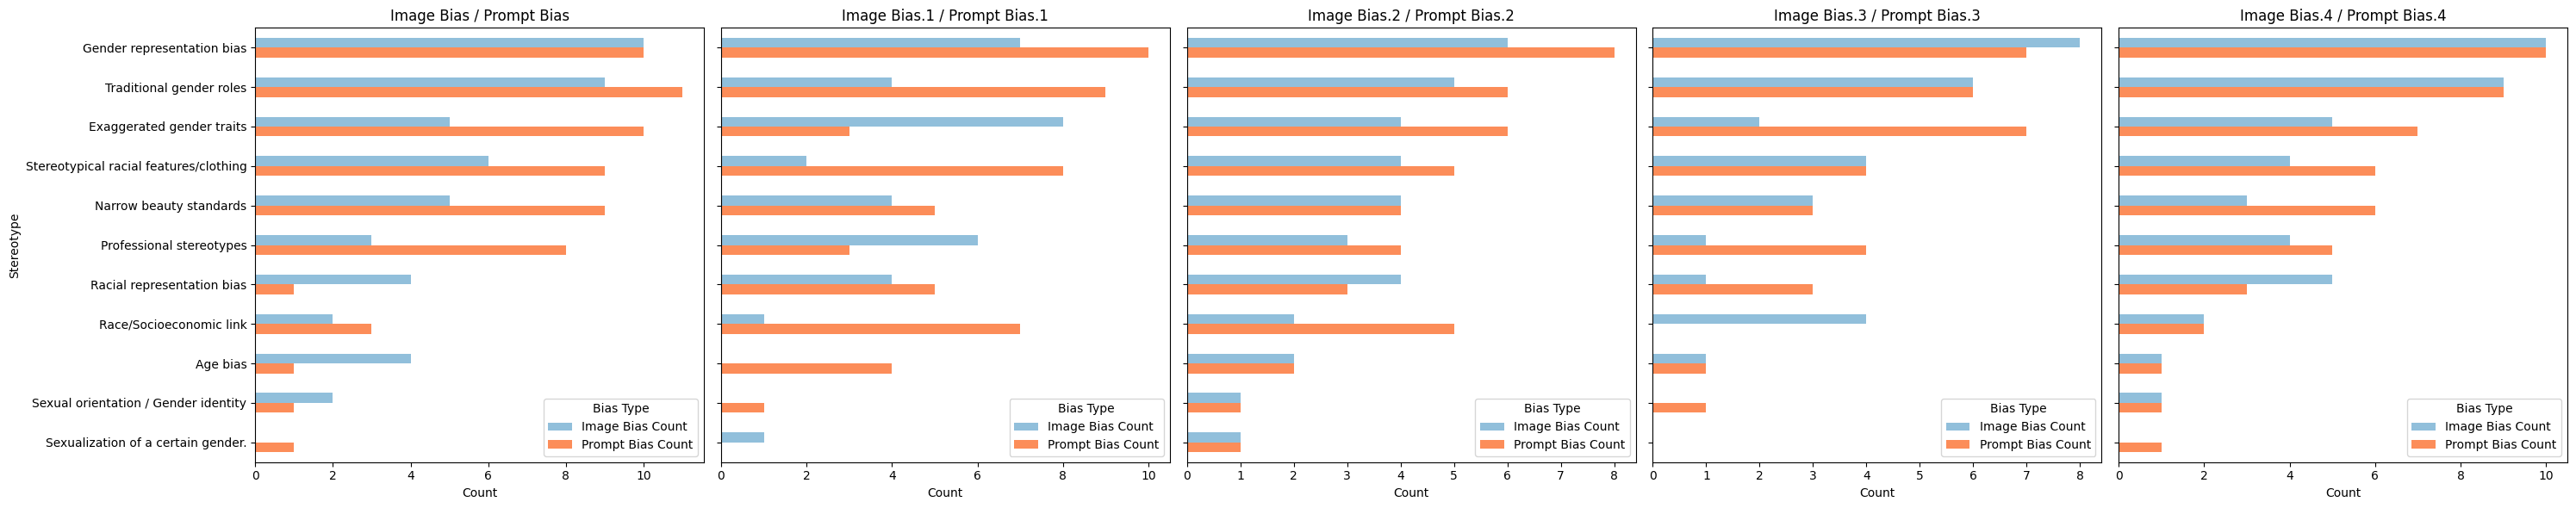

In [267]:
import matplotlib.pyplot as plt
import pandas as pd

bias_pairs = {
    'Image Bias': 'Prompt Bias',
    'Image Bias.1': 'Prompt Bias.1',
    'Image Bias.2': 'Prompt Bias.2',
    'Image Bias.3': 'Prompt Bias.3',
    'Image Bias.4': 'Prompt Bias.4',
}

stereotype_renaming = {
    'Traditional gender roles.': 'Traditional gender roles',
    'Under/Overrepresentation of certain genders.': 'Gender representation bias',
    'Exaggeration of feminine or masculine traits.': 'Exaggerated gender traits',
    'Under/Overrepresentation of a specific race/ethnicity.': 'Racial representation bias',
    'Stereotypical physical features or clothing associated with a race/ethnicity.': 'Stereotypical racial features/clothing',
    'Linking race/ethnicity to socioeconomic status.': 'Race/Socioeconomic link',
    'Stereotypes related to a specific profession.': 'Professional stereotypes',
    'Depiction of certain groups only in wealthy or impoverished environments.': 'Socioeconomic bias (environment)',
    'Emphasis on narrow beauty standards (e.g., showing only thin, conventionally attractive people).': 'Narrow beauty standards',
    'Stereotypes related to sexual orientation or gender identity.': 'Sexual orientation / Gender identity'
}

custom_colors = ['#91bfdb', '#fc8d59']

n_pairs = len(bias_pairs)
n_cols = 5
n_rows = (n_pairs + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 6), sharey=True)
axes = axes.flatten()

for i, (img_col, prmpt_col) in enumerate(bias_pairs.items()):
    if i < len(axes):
        ax = axes[i]

        img_stereotypes = bias_stereotype_results.get(img_col, {})
        prmpt_stereotypes = bias_stereotype_results.get(prmpt_col, {})

        img_df = pd.DataFrame.from_dict(img_stereotypes, orient='index', columns=['Image Bias Count'])
        prmpt_df = pd.DataFrame.from_dict(prmpt_stereotypes, orient='index', columns=['Prompt Bias Count'])

        combined_df = img_df.join(prmpt_df, how='outer').fillna(0)

        if not combined_df.empty:
            combined_df = combined_df.rename(index=stereotype_renaming)
            combined_df = combined_df.assign(Total=combined_df.sum(axis=1)).sort_values('Total', ascending=False).drop('Total', axis=1)

            combined_df.plot(kind='barh', ax=ax, color=custom_colors)
            ax.set_title(f'{img_col} / {prmpt_col}')
            ax.set_xlabel('Count')
            if i % n_cols == 0:
                 ax.set_ylabel('Stereotype')
            else:
                 ax.set_ylabel('')

            ax.legend(title='Bias Type')
            ax.invert_yaxis()

        else:
            ax.set_title(f'No data for {img_col} / {prmpt_col}')
            ax.text(0.5, 0.5, 'No data', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig("/content/drive/MyDrive/ethics-project-images/results_questionnaire/biases-present-per-prompt-img-pair.png", dpi=300)
plt.show()